In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
#from svastik import * #ignore if not using xgboost!
%matplotlib inline
data = pd.read_csv("dataset.csv")
col_names = ["SID",'buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'overall_condition']
data.columns = col_names
col_names
oh = OneHotEncoder()
X = oh.fit_transform(data.iloc[:, :-1])

y = data.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# use if performing one hot encoding!
'''
#remove target variable!
X = data.drop(["overall_condition"], axis =1)
X = data.drop(["SID"],axis=1)
y = data["overall_condition"]
X,y




col = list(X.columns)
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
X_encoded = enc.fit_transform(X)
X[X.columns] = X_encoded
#encode the labels
X
'''

'\n#remove target variable!\nX = data.drop(["overall_condition"], axis =1)\nX = data.drop(["SID"],axis=1)\ny = data["overall_condition"]\nX,y\n\n\n\n\ncol = list(X.columns)\nfrom sklearn.preprocessing import OrdinalEncoder\nenc = OrdinalEncoder()\nX_encoded = enc.fit_transform(X)\nX[X.columns] = X_encoded\n#encode the labels\nX\n'

In [2]:
'''
X_train = np.array([[3,3,0,0,2,1],[3,3,0,0,2,2],[3,3,0,0,2,0],[3,3,0,0,1,1],[3,3,0,0,1,2]]) # sample of 5 tuples
y_train = np.array([2,2,2,2,2])
def split_dataset(X, node_indices, feature):
    left_indices = []
    right_indices = []
    

    for i in node_indices:   
        if X[i][feature] == 1:
            left_indices.append(i)
        else:
            right_indices.append(i)
    return left_indices, right_indices
    '''

'\nX_train = np.array([[3,3,0,0,2,1],[3,3,0,0,2,2],[3,3,0,0,2,0],[3,3,0,0,1,1],[3,3,0,0,1,2]]) # sample of 5 tuples\ny_train = np.array([2,2,2,2,2])\ndef split_dataset(X, node_indices, feature):\n    left_indices = []\n    right_indices = []\n    \n\n    for i in node_indices:   \n        if X[i][feature] == 1:\n            left_indices.append(i)\n        else:\n            right_indices.append(i)\n    return left_indices, right_indices\n    '

In [3]:
def compute_entropy_parent(labels) : #y== labels
    parent = 0
    for label in np.unique(labels):
        prop = np.sum(labels == label) / len(labels)
        parent -= prop * np.log2(prop)
    return parent
def entropy_child(feature,labels):
    unique_values = np.unique(feature)
    wlc = 0
    for value in unique_values:
        child_labels = labels[feature == value]
        prop = len(child_labels) / len(labels)
        child = 0
        for label in np.unique(labels):
            child_proportion = np.sum(child_labels == label) / len(child_labels)
            if child_proportion > 0:
                child -= child_proportion * np.log2(child_proportion)
        wlc += prop * child
        return wlc



In [4]:

def compute_information_gain(X, y):
    info_gain = compute_entropy_parent(y)-entropy_child(X,y)
    return info_gain

In [5]:
features = data.columns[1:-1] # remove first column

for feature in features:
    i= compute_information_gain(data[feature], y)
    print(f"Information gain for {feature}: {i}")


Information gain for buying: 1.002921438897392
Information gain for maint: 0.9600818322275279
Information gain for doors: 0.9423870738671338
Information gain for persons: 1.205740970012175
Information gain for lug_boot: 0.7486688768517029
Information gain for safety: 0.6672370201523043


In [6]:
from sklearn import tree
from sklearn.metrics import confusion_matrix

dt = tree.DecisionTreeClassifier()

dt.fit(X_train, y_train)

# Predict labels 
y_pred = dt.predict(X_test)

# Calculate accuracy score and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {accuracy}")

label = {
    0: 'unacceptable',
    1: 'acceptable',
    2: 'good',
    3: 'very good'
}

# main interface ^__^ prediction results!
for i in range(X_test.shape[0]):
    features = X_test[i]
    label = y_pred[i]
    condition = label
    print(f"features: {features}\n condition: {condition}\n")


Accuracy: 0.9479768786127167
features:   (0, 598)	1.0
  (0, 1728)	1.0
  (0, 1732)	1.0
  (0, 1738)	1.0
  (0, 1740)	1.0
  (0, 1744)	1.0
  (0, 1746)	1.0
 condition: unacc

features:   (0, 1200)	1.0
  (0, 1730)	1.0
  (0, 1733)	1.0
  (0, 1736)	1.0
  (0, 1741)	1.0
  (0, 1744)	1.0
  (0, 1748)	1.0
 condition: good

features:   (0, 627)	1.0
  (0, 1728)	1.0
  (0, 1732)	1.0
  (0, 1739)	1.0
  (0, 1740)	1.0
  (0, 1743)	1.0
  (0, 1748)	1.0
 condition: unacc

features:   (0, 1497)	1.0
  (0, 1729)	1.0
  (0, 1732)	1.0
  (0, 1739)	1.0
  (0, 1741)	1.0
  (0, 1744)	1.0
  (0, 1748)	1.0
 condition: acc

features:   (0, 1262)	1.0
  (0, 1730)	1.0
  (0, 1733)	1.0
  (0, 1738)	1.0
  (0, 1742)	1.0
  (0, 1744)	1.0
  (0, 1747)	1.0
 condition: unacc

features:   (0, 930)	1.0
  (0, 1730)	1.0
  (0, 1735)	1.0
  (0, 1738)	1.0
  (0, 1741)	1.0
  (0, 1744)	1.0
  (0, 1748)	1.0
 condition: unacc

features:   (0, 22)	1.0
  (0, 1731)	1.0
  (0, 1735)	1.0
  (0, 1736)	1.0
  (0, 1742)	1.0
  (0, 1744)	1.0
  (0, 1746)	1.0
 condition:

[Text(0.7161144578313253, 0.9615384615384616, 'x[1747] <= 0.5\ngini = 0.452\nsamples = 1209\nvalue = [266, 50, 852, 41]'),
 Text(0.704066265060241, 0.8846153846153846, 'x[1740] <= 0.5\ngini = 0.576\nsamples = 802\nvalue = [266, 50, 445, 41]'),
 Text(0.6920180722891566, 0.8076923076923077, 'x[1735] <= 0.5\ngini = 0.628\nsamples = 542\nvalue = [266, 50, 185, 41]'),
 Text(0.48042168674698793, 0.7307692307692307, 'x[1729] <= 0.5\ngini = 0.63\nsamples = 407\nvalue = [218, 50, 98, 41]'),
 Text(0.27710843373493976, 0.6538461538461539, 'x[1745] <= 0.5\ngini = 0.56\nsamples = 311\nvalue = [182, 18, 94, 17]'),
 Text(0.1355421686746988, 0.5769230769230769, 'x[1730] <= 0.5\ngini = 0.515\nsamples = 207\nvalue = [137, 14, 39, 17]'),
 Text(0.07228915662650602, 0.5, 'x[1732] <= 0.5\ngini = 0.394\nsamples = 137\nvalue = [100, 0, 37, 0]'),
 Text(0.03614457831325301, 0.4230769230769231, 'x[1746] <= 0.5\ngini = 0.187\nsamples = 96\nvalue = [86, 0, 10, 0]'),
 Text(0.024096385542168676, 0.34615384615384615,

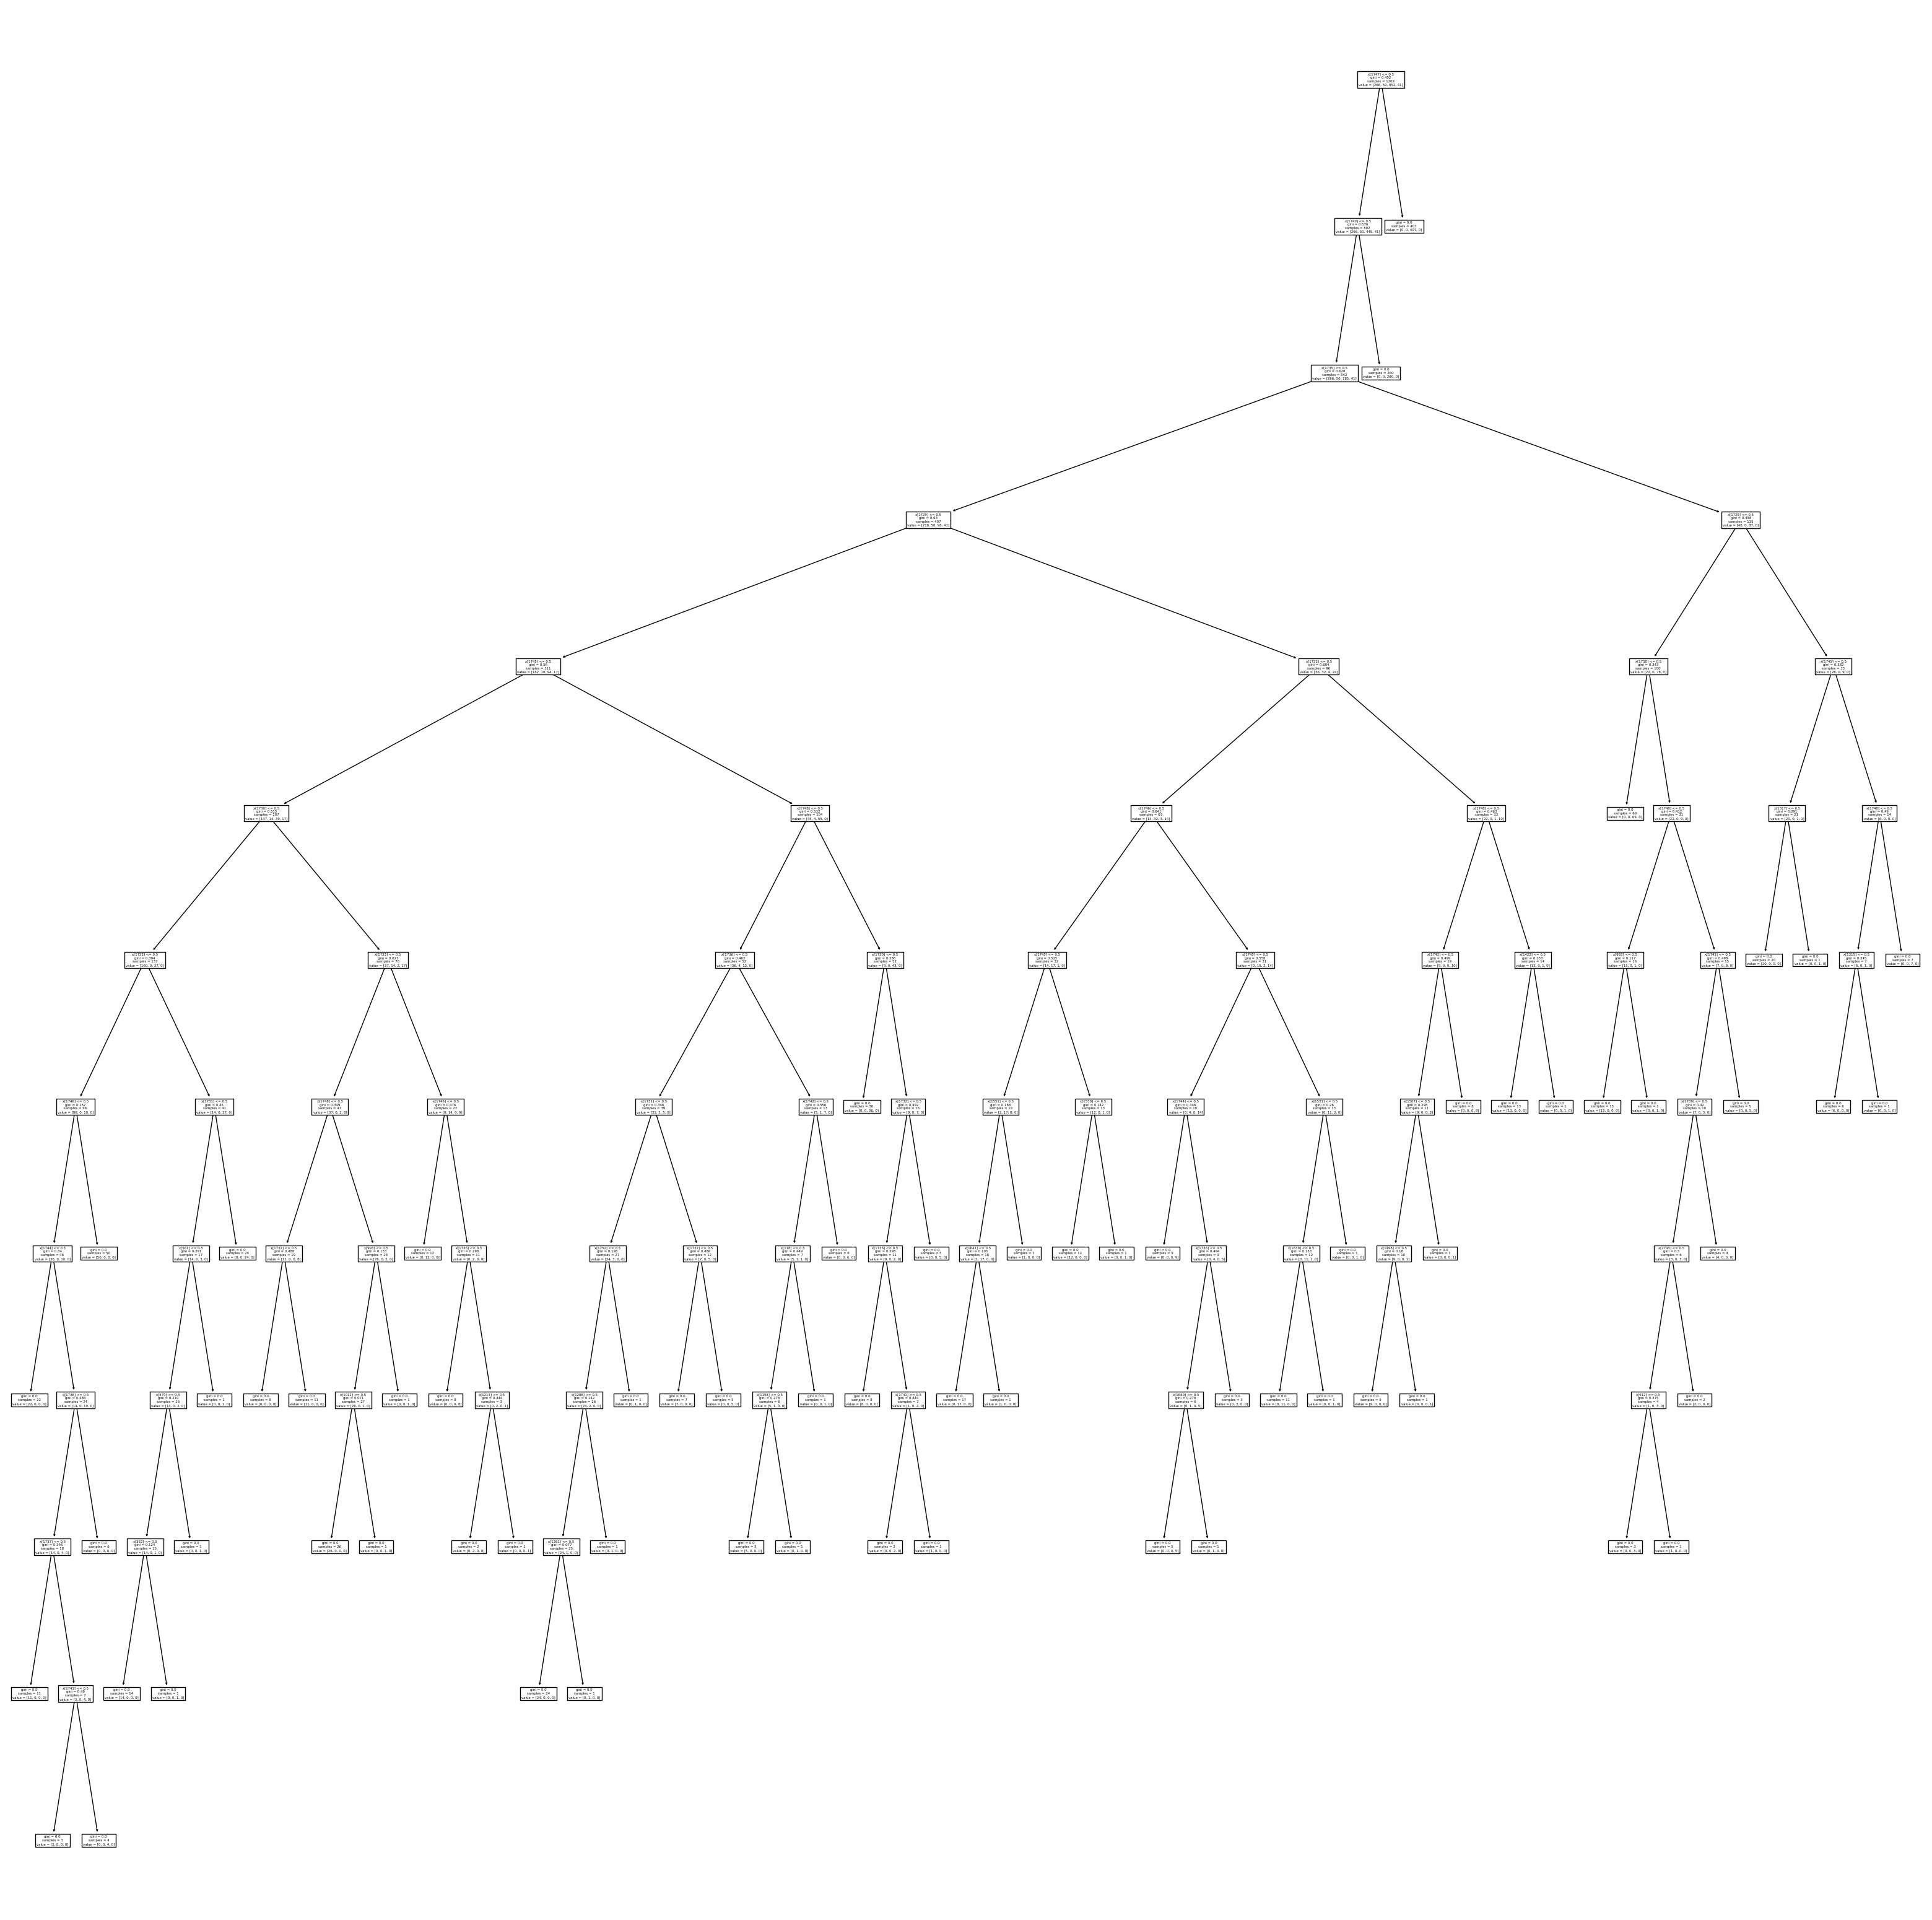

In [7]:
plt.figure(figsize=(40,40))
tree.plot_tree(dt.fit(X_train, y_train))